In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/prediction-of-music-genre/music_genre.csv


In [2]:
data = pd.read_csv('/kaggle/input/prediction-of-music-genre/music_genre.csv')
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


# Data Cleaning

In [3]:
data.drop(['instance_id', 'artist_name', 'track_name'], axis=1, inplace=True) #deleting unnecessary columns
data.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [4]:
data['obtained_date'].unique() #column gives zero information

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', nan, '0/4'], dtype=object)

In [5]:
data.drop('obtained_date', axis=1, inplace=True)

In [6]:
data.isna().sum()

popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
valence             5
music_genre         5
dtype: int64

In [7]:
data[data['music_genre'].isna()]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#deleting empty rows
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [9]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


<Axes: >

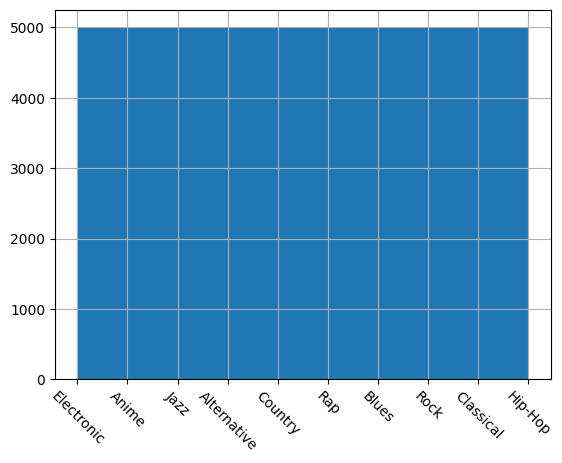

In [10]:
data['music_genre'].hist(xrot=-45)

**classes are balanced**

# Data Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = data.drop('music_genre', axis=1)
y = data['music_genre']

numerical_cols = X.columns[X.dtypes != object]
categorical_cols = X.columns[X.dtypes == object]

numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(drop='if_binary'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X = preprocessor.fit_transform(X)

In [12]:
target_names = y.unique()
target_dict = dict(zip(target_names, range(len(target_names))))
y = y.replace(to_replace=target_names, value=list(target_dict.values())).infer_objects(copy=False)

/tmp/ipykernel_17/4276942558.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(to_replace=target_names, value=list(target_dict.values())).infer_objects(copy=False)


# Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split

test_ratio = 0.2
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = test_ratio, 
    random_state = random_state,
    shuffle = True,
    stratify = y
)

print(X_train.shape)
print(X_test.shape)

(40000, 29417)
(10000, 29417)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model_logReg = LogisticRegression(random_state=random_state)
model_logReg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

In [15]:
import matplotlib.pyplot as plt
import plotly.express as px

preds = model_logReg.predict(X_test)

plt.rcParams ['figure.figsize' ] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, preds), x = target_names, y = target_names, text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

In [16]:
print(classification_report(y_test, preds, target_names = target_names))

              precision    recall  f1-score   support

  Electronic       0.55      0.59      0.57      1000
       Anime       0.60      0.59      0.59      1000
        Jazz       0.49      0.38      0.43      1000
 Alternative       0.36      0.28      0.31      1000
     Country       0.43      0.54      0.48      1000
         Rap       0.35      0.32      0.33      1000
       Blues       0.48      0.45      0.46      1000
        Rock       0.48      0.59      0.53      1000
   Classical       0.78      0.80      0.79      1000
     Hip-Hop       0.36      0.37      0.36      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

number_of_neighbors = np.arange(3, 25, 2)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors": number_of_neighbors}

grid_search = GridSearchCV(estimator = model_KNN,
                           param_grid = params, cv = 6)

In [18]:
grid_search.fit(X_train, y_train)
grid_search.best_score_

0.5122500700647535

In [19]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=23)

In [20]:
preds_knn = grid_search.predict(X_test)

In [21]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, preds_knn), x = target_names, y = target_names, text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

In [22]:
print(classification_report(y_test, preds_knn))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56      1000
           1       0.69      0.64      0.67      1000
           2       0.52      0.44      0.48      1000
           3       0.38      0.34      0.36      1000
           4       0.39      0.60      0.48      1000
           5       0.40      0.39      0.39      1000
           6       0.55      0.41      0.47      1000
           7       0.47      0.54      0.50      1000
           8       0.82      0.83      0.83      1000
           9       0.38      0.41      0.40      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000



# SVM

In [23]:
from sklearn.svm import SVC

parameters = {'kernel':('linear', "poly", "sigmoid")}

model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv = 6)
grid_search_svm.fit(X_train, y_train)
grid_search_svm.best_score_

0.5425752039730747

In [24]:
grid_search_svm.best_estimator_

SVC(kernel='poly')

In [25]:
preds_svc = grid_search_svm.predict(X_test)

In [26]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, preds_svc), x = target_names, y = target_names, text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

In [27]:
print(classification_report(y_test, preds_svc))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60      1000
           1       0.74      0.67      0.70      1000
           2       0.54      0.44      0.49      1000
           3       0.38      0.36      0.37      1000
           4       0.40      0.64      0.49      1000
           5       0.42      0.23      0.30      1000
           6       0.58      0.51      0.54      1000
           7       0.50      0.59      0.54      1000
           8       0.86      0.80      0.83      1000
           9       0.42      0.53      0.47      1000

    accuracy                           0.53     10000
   macro avg       0.55      0.53      0.53     10000
weighted avg       0.55      0.53      0.53     10000

